## Microsegmentation_applied

In this step, we perform a micro segmentation using a K-means clustering model of the (macro)cluster number 4 which is the most strategical one as we explained in "5.Clustering applied.ipynb"

### Importing the relevant libraries and datasets.

In [92]:
import pandas as pd
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
from scipy import stats
from sklearn.cluster import KMeans

In [93]:
from statsmodels.stats import outliers_influence
from statsmodels.tools.tools import add_constant

In [94]:
micro = pd.read_csv("../../data_final_project/pre_micro_df.csv")

In [95]:
micro.head()

,HOUSEHOLD_KEY,APPAREL,AUTOMOTIVE,BABY_CARE,BAKED,BREAKFAST,CLEANING_PROD,CONDIMENTS,COSMETICS,DAIRY,DELI,DRINKS_JUICES,DRUGSTORE,ECO,ELECTRIC,ELECTRONICS,FLORAL,FROZEN_GROCERY,FRUITS_VEGETABLES,GARDEN CENTER,GARDEN_CENTER,GRAINS_PASTA_SIDES,HISPANIC_FOOD,HOME,HOUSEWARES,KIDS,KIOSK,LIQUOUR,MEAT,MISCELLANEOUS,OTHERS,PERSONAL_CARE,PETS_SUPPLIES,RESTAURANT,SEAFOOD,SEASONS,SMOKING,SNACKS,SPORTS_MISC,cluster
0,1,1.79,0.0,0.000000,2.835926,2.775641,3.960000,2.915476,0.000000,2.787355,3.318382,5.169588,6.740000,2.611739,4.693333,0.000,7.99,3.034086,2.192415,0.0,0.00,1.990748,1.090000,1.190,4.249747,2.816737,0.000000,0.000000,3.540000,10.000000,0.0,3.962083,0.0000,1.390000,3.940000,4.025,5.880000,2.878698,6.17,3
1,7,0.00,0.0,3.429877,2.400339,2.616375,4.485556,2.930435,7.203125,2.846696,5.128125,3.075325,5.773333,2.990000,3.540000,3.000,4.99,4.089278,2.588736,0.0,4.29,2.441200,5.670000,12.485,2.828571,2.911600,3.523684,4.990000,4.745309,1.750000,0.0,4.305000,2.9190,0.000000,4.060000,3.115,0.000000,2.556600,0.00,2
2,20,0.00,0.0,7.990000,3.568809,3.048807,3.740000,2.347326,1.990000,2.742246,0.000000,5.351111,5.014800,0.000000,3.990000,0.000,0.00,3.354453,2.474306,0.0,0.00,2.698041,1.985556,0.000,2.096316,2.119444,2.674615,7.906667,3.818632,25.222708,23.8,2.655000,7.7275,7.666667,3.764706,5.990,5.157843,3.006389,1.89,2
3,25,2.00,0.0,2.190000,1.804696,2.864318,2.832857,1.933611,0.000000,4.021583,5.121250,4.221304,5.830000,1.000000,1.340000,10.665,0.00,2.430588,2.456418,0.0,0.00,1.992647,0.000000,2.250,3.195263,2.716667,2.018000,10.374615,3.560373,13.462857,0.0,4.090000,0.0000,0.000000,4.316000,1.000,41.105263,2.585714,1.49,2
4,27,2.84,0.0,0.000000,2.205714,2.108571,3.480000,1.463673,1.045000,1.797483,1.813400,1.672558,3.475455,1.490000,0.000000,0.000,0.00,2.604375,2.077692,0.0,0.00,2.116875,0.000000,0.000,1.767857,1.491778,2.458421,4.196424,3.298495,5.361538,0.0,3.203333,2.4500,0.000000,3.560000,1.090,4.226196,2.139000,0.00,4


### Performing a multicollinearity test with variance inflation factor to make sure that our model do not suffer from the effects of multicollinearity,

In [96]:
X = add_constant(micro)

mc_check = pd.Series([outliers_influence.variance_inflation_factor(X.values, i) for i in range(X.shape[1])],
             index=X.columns)
print(mc_check)

const                 80.888852
HOUSEHOLD_KEY          1.169218
APPAREL                1.211768
AUTOMOTIVE             1.158485
BABY_CARE              1.161964
BAKED                  1.565784
BREAKFAST              1.893910
CLEANING_PROD          1.405902
CONDIMENTS             1.930563
COSMETICS              1.216827
DAIRY                  1.575125
DELI                   1.230386
DRINKS_JUICES          1.286330
DRUGSTORE              1.807492
ECO                    1.200258
ELECTRIC               1.142962
ELECTRONICS            1.104443
FLORAL                 1.223605
FROZEN_GROCERY         1.468995
FRUITS_VEGETABLES      1.687909
GARDEN CENTER          1.146822
GARDEN_CENTER          1.165174
GRAINS_PASTA_SIDES     2.447899
HISPANIC_FOOD          1.351028
HOME                   1.163428
HOUSEWARES             1.354063
KIDS                   1.197740
KIOSK                  1.128554
LIQUOUR                1.288423
MEAT                   1.730564
MISCELLANEOUS          1.209473
OTHERS  

/home/salva/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


#### Comments:

We can safely assume based on the results that our model will not suffer from the effects of multicollinearity as the variances inflation factors are below 2.5

### Slicing the micro table to only include cluster number 4 which is the strategical cluster for the retailer. 

In [97]:
micro_cluster_4 = micro[micro['cluster'] == 4]

In [98]:
micro_cluster_4.head()

,HOUSEHOLD_KEY,APPAREL,AUTOMOTIVE,BABY_CARE,BAKED,BREAKFAST,CLEANING_PROD,CONDIMENTS,COSMETICS,DAIRY,DELI,DRINKS_JUICES,DRUGSTORE,ECO,ELECTRIC,ELECTRONICS,FLORAL,FROZEN_GROCERY,FRUITS_VEGETABLES,GARDEN CENTER,GARDEN_CENTER,GRAINS_PASTA_SIDES,HISPANIC_FOOD,HOME,HOUSEWARES,KIDS,KIOSK,LIQUOUR,MEAT,MISCELLANEOUS,OTHERS,PERSONAL_CARE,PETS_SUPPLIES,RESTAURANT,SEAFOOD,SEASONS,SMOKING,SNACKS,SPORTS_MISC,cluster
4,27,2.84,0.00,0.000000,2.205714,2.108571,3.480000,1.463673,1.045,1.797483,1.813400,1.672558,3.475455,1.490000,0.000000,0.00,0.000000,2.604375,2.077692,0.00,0.00,2.116875,0.000000,0.000,1.767857,1.491778,2.458421,4.196424,3.298495,5.361538,0.0,3.203333,2.450000,0.0,3.560000,1.090000,4.226196,2.139000,0.000,4
9,52,14.99,3.19,4.890000,3.303985,3.482955,5.811905,2.709531,0.000,2.584770,4.929524,4.848298,5.681176,3.240000,4.626667,0.00,12.388000,4.103958,2.619386,13.34,3.99,2.542245,3.030811,2.490,3.848919,2.435000,4.457222,7.538750,5.334382,35.284667,20.0,4.273600,3.920000,0.0,7.238750,4.990000,2.930000,3.436136,0.000,4
12,74,0.00,0.00,0.000000,1.961228,1.715400,3.630000,2.039000,5.590,2.807213,2.283333,6.778372,10.602353,2.685000,0.000000,7.19,0.000000,1.936977,2.752538,0.00,0.00,2.375312,0.000000,0.000,3.814130,2.508889,2.490000,0.000000,6.055312,2.121000,0.0,3.205000,1.500484,0.0,5.628000,7.992500,0.000000,2.695091,0.000,4
19,105,0.00,0.00,3.490000,1.750168,2.378031,3.215000,1.920405,1.495,2.576056,2.627105,2.270808,3.132857,1.747143,0.000000,0.00,2.660000,2.431111,2.053808,0.00,0.00,2.255866,1.953333,0.000,2.095714,2.874211,1.656667,0.000000,5.438615,0.000000,0.0,2.187500,3.632857,0.0,4.344762,1.000000,37.340000,2.808721,3.990,4
35,198,0.00,1.89,5.899107,2.169720,2.273714,3.111515,2.063575,2.585,2.837352,6.853750,2.952603,4.918800,2.474286,9.760000,11.24,2.523333,3.039795,2.734280,0.00,0.00,2.524402,2.257895,9.796,2.625921,2.403000,4.515472,9.020769,6.157432,1.913333,0.0,3.636923,3.447200,0.0,7.581250,4.742353,5.401600,2.447929,10.105,4


In [99]:
micro_cluster_4.head()

,HOUSEHOLD_KEY,APPAREL,AUTOMOTIVE,BABY_CARE,BAKED,BREAKFAST,CLEANING_PROD,CONDIMENTS,COSMETICS,DAIRY,DELI,DRINKS_JUICES,DRUGSTORE,ECO,ELECTRIC,ELECTRONICS,FLORAL,FROZEN_GROCERY,FRUITS_VEGETABLES,GARDEN CENTER,GARDEN_CENTER,GRAINS_PASTA_SIDES,HISPANIC_FOOD,HOME,HOUSEWARES,KIDS,KIOSK,LIQUOUR,MEAT,MISCELLANEOUS,OTHERS,PERSONAL_CARE,PETS_SUPPLIES,RESTAURANT,SEAFOOD,SEASONS,SMOKING,SNACKS,SPORTS_MISC,cluster
4,27,2.84,0.00,0.000000,2.205714,2.108571,3.480000,1.463673,1.045,1.797483,1.813400,1.672558,3.475455,1.490000,0.000000,0.00,0.000000,2.604375,2.077692,0.00,0.00,2.116875,0.000000,0.000,1.767857,1.491778,2.458421,4.196424,3.298495,5.361538,0.0,3.203333,2.450000,0.0,3.560000,1.090000,4.226196,2.139000,0.000,4
9,52,14.99,3.19,4.890000,3.303985,3.482955,5.811905,2.709531,0.000,2.584770,4.929524,4.848298,5.681176,3.240000,4.626667,0.00,12.388000,4.103958,2.619386,13.34,3.99,2.542245,3.030811,2.490,3.848919,2.435000,4.457222,7.538750,5.334382,35.284667,20.0,4.273600,3.920000,0.0,7.238750,4.990000,2.930000,3.436136,0.000,4
12,74,0.00,0.00,0.000000,1.961228,1.715400,3.630000,2.039000,5.590,2.807213,2.283333,6.778372,10.602353,2.685000,0.000000,7.19,0.000000,1.936977,2.752538,0.00,0.00,2.375312,0.000000,0.000,3.814130,2.508889,2.490000,0.000000,6.055312,2.121000,0.0,3.205000,1.500484,0.0,5.628000,7.992500,0.000000,2.695091,0.000,4
19,105,0.00,0.00,3.490000,1.750168,2.378031,3.215000,1.920405,1.495,2.576056,2.627105,2.270808,3.132857,1.747143,0.000000,0.00,2.660000,2.431111,2.053808,0.00,0.00,2.255866,1.953333,0.000,2.095714,2.874211,1.656667,0.000000,5.438615,0.000000,0.0,2.187500,3.632857,0.0,4.344762,1.000000,37.340000,2.808721,3.990,4
35,198,0.00,1.89,5.899107,2.169720,2.273714,3.111515,2.063575,2.585,2.837352,6.853750,2.952603,4.918800,2.474286,9.760000,11.24,2.523333,3.039795,2.734280,0.00,0.00,2.524402,2.257895,9.796,2.625921,2.403000,4.515472,9.020769,6.157432,1.913333,0.0,3.636923,3.447200,0.0,7.581250,4.742353,5.401600,2.447929,10.105,4


In [100]:
micro_cluster_4.drop("HOUSEHOLD_KEY", axis=1, inplace=True)

/home/salva/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


### As K-means performs euclidean distances, we decided to scale the data to optimize the model.

In [101]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(micro_cluster_4)

/home/salva/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [102]:
micro_scaled_4 = scaler.transform(micro_cluster_4)

/home/salva/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [103]:
micro_scaled_4 = pd.DataFrame(micro_scaled_4)

In [104]:
micro_scaled_4.columns = micro_cluster_4.columns

In [105]:
micro_scaled_4.head()

,APPAREL,AUTOMOTIVE,BABY_CARE,BAKED,BREAKFAST,CLEANING_PROD,CONDIMENTS,COSMETICS,DAIRY,DELI,DRINKS_JUICES,DRUGSTORE,ECO,ELECTRIC,ELECTRONICS,FLORAL,FROZEN_GROCERY,FRUITS_VEGETABLES,GARDEN CENTER,GARDEN_CENTER,GRAINS_PASTA_SIDES,HISPANIC_FOOD,HOME,HOUSEWARES,KIDS,KIOSK,LIQUOUR,MEAT,MISCELLANEOUS,OTHERS,PERSONAL_CARE,PETS_SUPPLIES,RESTAURANT,SEAFOOD,SEASONS,SMOKING,SNACKS,SPORTS_MISC,cluster
0,0.072343,-0.679577,-1.018163,-0.615624,-0.933825,-0.524142,-1.842708,-0.703901,-2.518221,-1.340828,-1.630261,-1.073591,-0.387025,-0.545973,-0.616817,-0.897737,-0.922946,-1.170981,-0.315516,-0.441179,-0.860863,-1.991906,-0.473973,-1.420895,-1.479183,-0.511992,-0.297662,-1.765762,-0.485036,-0.482666,-0.665555,-0.364797,-0.358979,-0.583912,-0.715564,-0.051458,-1.513174,-0.668214,0.0
1,2.974142,0.990578,0.054519,1.254568,1.316823,0.728828,0.073619,-1.092763,-0.768476,0.283081,0.904559,-0.054387,0.293568,0.019983,-0.616817,0.762596,0.878397,0.046928,0.828364,0.798471,-0.000615,1.048722,-0.091339,0.145007,-0.136210,0.834711,0.570625,-0.356980,2.627708,2.136039,0.569217,-0.050875,-0.358979,0.668011,0.481065,-0.235440,1.160416,-0.668214,0.0
2,-0.605938,-0.679577,-1.018163,-1.031947,-1.577670,-0.443544,-0.957765,0.987373,-0.274097,-1.095931,2.445110,2.219553,0.077722,-0.545973,0.027846,-0.897737,-1.724645,0.346299,-0.315516,-0.441179,-0.338211,-1.991906,-0.473973,0.118831,-0.031006,-0.490716,-1.387831,0.141886,-0.822132,-0.482666,-0.663632,-0.567569,-0.358979,0.119854,1.402316,-0.651323,-0.366988,-0.668214,0.0
3,-0.605938,-0.679577,-0.252588,-1.391352,-0.492565,-0.666530,-1.140182,-0.536448,-0.787843,-0.916781,-1.152749,-1.231896,-0.287020,-0.545973,-0.616817,-0.541224,-1.131076,-1.224682,-0.315516,-0.441179,-0.579774,-0.032246,-0.473973,-1.174198,0.489144,-1.052179,-1.387831,-0.284853,-1.042769,-0.482666,-1.837527,-0.112195,-0.358979,-0.316848,-0.743179,4.648706,-0.132780,-0.079947,0.0
4,-0.605938,0.309951,0.275879,-0.676917,-0.663392,-0.722135,-0.919964,-0.130840,-0.207113,1.285855,-0.608552,-0.406661,-0.004226,0.647917,0.390973,-0.559541,-0.399907,0.305247,-0.315516,-0.441179,-0.036699,0.273302,1.031360,-0.775242,-0.181772,0.873957,0.955631,0.212550,-0.843735,-0.482666,-0.165320,-0.151843,-0.358979,0.784568,0.405080,0.115378,-0.876425,0.821619,0.0


### Removing the 'cluster' column as it is no longer needed

In [106]:
micro_scaled_4.drop('cluster', axis=1, inplace=True)

## Evaluating the amount of clusters to use based on the innertia score metric

### Performing a Hierarchical clustering Dendogram

By performing a hierarchical clustering we can build a dendogram or cluster tree to represent the data. These groups are represented and structured in a tree where we can identify which ones are similar to others and which ones are different from each other. Additionaly, groups that are closer to the same height are similar to each other and groups with different heights are different. Based on this, we can identify where to cut the tree and estimate in how many clusters we can segment our data.

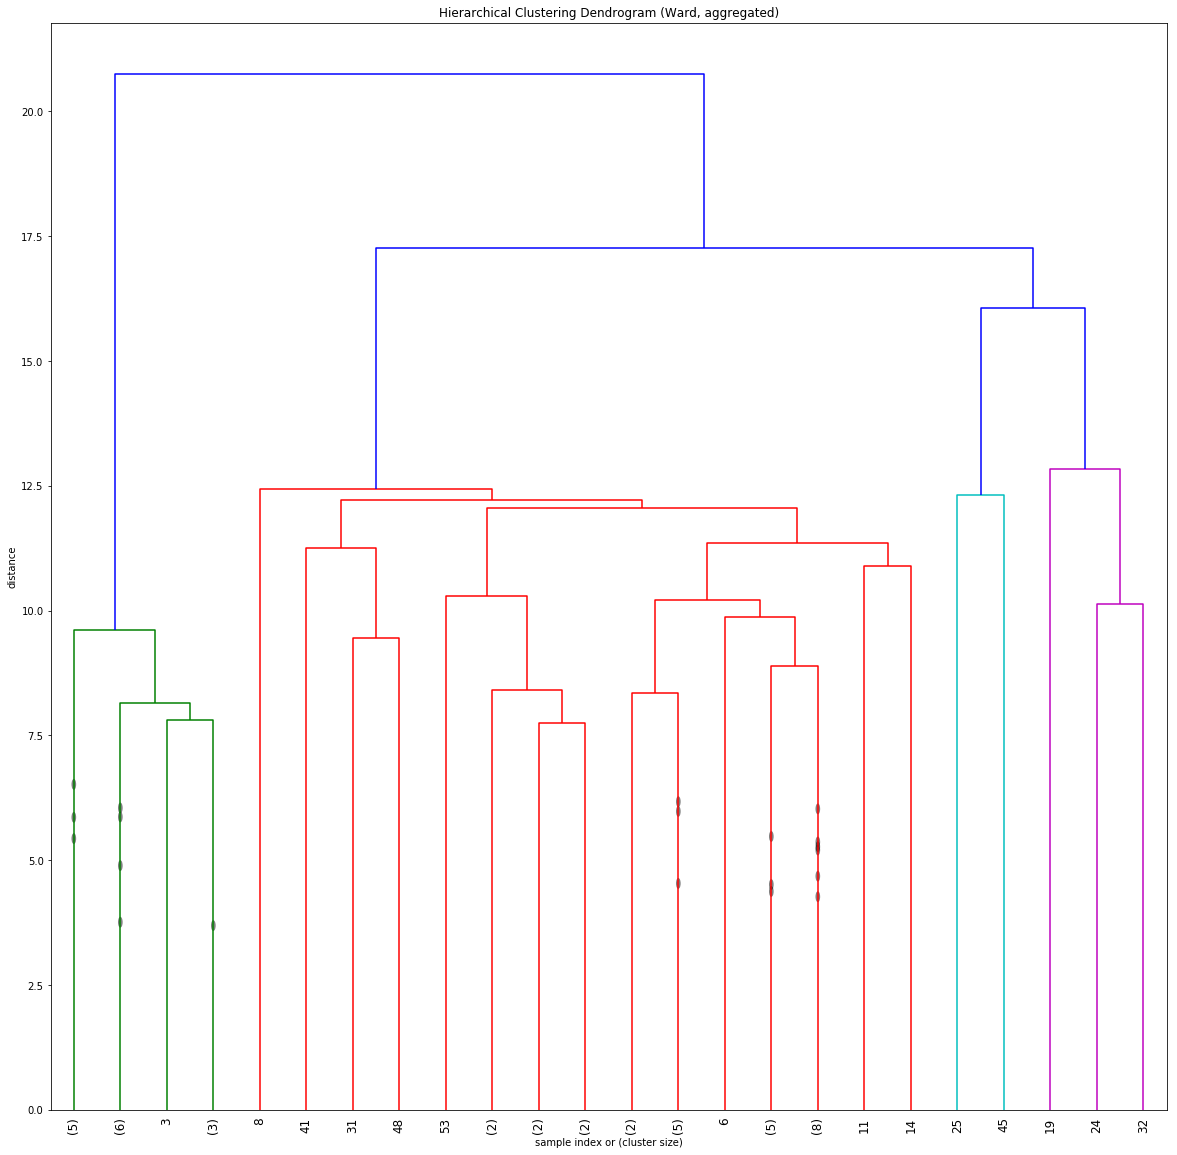

In [107]:
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_matrix = linkage(micro_scaled_4, 'ward')
figure = plt.figure(figsize=(20, 20))
dendrogram(
    linkage_matrix,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=24,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.title('Hierarchical Clustering Dendrogram (Ward, aggregated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
plt.show()

In [108]:
clusters = []
innertia_scores = []

for i in range(1,10):
    kmeans_model = KMeans(n_clusters=i)
    kmeans_model.fit(micro_scaled_4)
    innertia_scores.append(kmeans_model.inertia_)
    clusters.append(i)

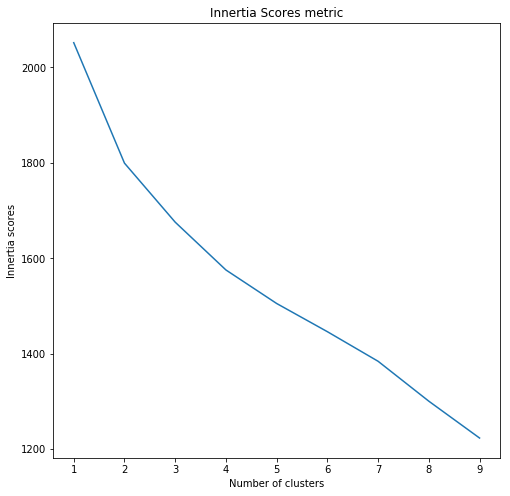

In [109]:
plt.figure(figsize=(8,8))
sns.lineplot(clusters, innertia_scores)
plt.title('Innertia Scores metric')
plt.xlabel('Number of clusters')
plt.ylabel('Innertia scores')
plt.show()

In [110]:
print(innertia_scores)

[2052.0000000000005, 1799.530440874273, 1675.7935716414013, 1575.616984426497, 1505.3358144627541, 1446.2201801141775, 1384.2015838059724, 1300.54009915966, 1223.32470036106]


### Performing the Kmeans model with number of clusters equal to 4.

When analysis the innertia scores, we decided to use 4 clusters as hyperparameter as the jump from 4 to 5 clusters is not large enough.

In [ ]:
kmeans_model = KMeans(n_clusters=4)
kmeans_model.fit(micro_scaled_4)

In [112]:
kmeans_model.inertia_

1570.2295491672817

### Adding the column 'cluster' to our original table 'micro_cluster_4'

In [113]:
micro_cluster_4['micro_cluster'] = kmeans_model.labels_

/home/salva/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [114]:
micro_cluster_4.head()

,APPAREL,AUTOMOTIVE,BABY_CARE,BAKED,BREAKFAST,CLEANING_PROD,CONDIMENTS,COSMETICS,DAIRY,DELI,DRINKS_JUICES,DRUGSTORE,ECO,ELECTRIC,ELECTRONICS,FLORAL,FROZEN_GROCERY,FRUITS_VEGETABLES,GARDEN CENTER,GARDEN_CENTER,GRAINS_PASTA_SIDES,HISPANIC_FOOD,HOME,HOUSEWARES,KIDS,KIOSK,LIQUOUR,MEAT,MISCELLANEOUS,OTHERS,PERSONAL_CARE,PETS_SUPPLIES,RESTAURANT,SEAFOOD,SEASONS,SMOKING,SNACKS,SPORTS_MISC,cluster,micro_cluster
4,2.84,0.00,0.000000,2.205714,2.108571,3.480000,1.463673,1.045,1.797483,1.813400,1.672558,3.475455,1.490000,0.000000,0.00,0.000000,2.604375,2.077692,0.00,0.00,2.116875,0.000000,0.000,1.767857,1.491778,2.458421,4.196424,3.298495,5.361538,0.0,3.203333,2.450000,0.0,3.560000,1.090000,4.226196,2.139000,0.000,4,0
9,14.99,3.19,4.890000,3.303985,3.482955,5.811905,2.709531,0.000,2.584770,4.929524,4.848298,5.681176,3.240000,4.626667,0.00,12.388000,4.103958,2.619386,13.34,3.99,2.542245,3.030811,2.490,3.848919,2.435000,4.457222,7.538750,5.334382,35.284667,20.0,4.273600,3.920000,0.0,7.238750,4.990000,2.930000,3.436136,0.000,4,2
12,0.00,0.00,0.000000,1.961228,1.715400,3.630000,2.039000,5.590,2.807213,2.283333,6.778372,10.602353,2.685000,0.000000,7.19,0.000000,1.936977,2.752538,0.00,0.00,2.375312,0.000000,0.000,3.814130,2.508889,2.490000,0.000000,6.055312,2.121000,0.0,3.205000,1.500484,0.0,5.628000,7.992500,0.000000,2.695091,0.000,4,0
19,0.00,0.00,3.490000,1.750168,2.378031,3.215000,1.920405,1.495,2.576056,2.627105,2.270808,3.132857,1.747143,0.000000,0.00,2.660000,2.431111,2.053808,0.00,0.00,2.255866,1.953333,0.000,2.095714,2.874211,1.656667,0.000000,5.438615,0.000000,0.0,2.187500,3.632857,0.0,4.344762,1.000000,37.340000,2.808721,3.990,4,0
35,0.00,1.89,5.899107,2.169720,2.273714,3.111515,2.063575,2.585,2.837352,6.853750,2.952603,4.918800,2.474286,9.760000,11.24,2.523333,3.039795,2.734280,0.00,0.00,2.524402,2.257895,9.796,2.625921,2.403000,4.515472,9.020769,6.157432,1.913333,0.0,3.636923,3.447200,0.0,7.581250,4.742353,5.401600,2.447929,10.105,4,3


### Grouping by cluster and performing a mean function as the aggregate function

In [115]:
micro_cluster_4.groupby('micro_cluster').mean().style.background_gradient(cmap='viridis', axis=1)

,APPAREL,AUTOMOTIVE,BABY_CARE,BAKED,BREAKFAST,CLEANING_PROD,CONDIMENTS,COSMETICS,DAIRY,DELI,DRINKS_JUICES,DRUGSTORE,ECO,ELECTRIC,ELECTRONICS,FLORAL,FROZEN_GROCERY,FRUITS_VEGETABLES,GARDEN CENTER,GARDEN_CENTER,GRAINS_PASTA_SIDES,HISPANIC_FOOD,HOME,HOUSEWARES,KIDS,KIOSK,LIQUOUR,MEAT,MISCELLANEOUS,OTHERS,PERSONAL_CARE,PETS_SUPPLIES,RESTAURANT,SEAFOOD,SEASONS,SMOKING,SNACKS,SPORTS_MISC,cluster
micro_cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.541154,0.214615,0.796923,2.09566,2.0512,3.22722,2.23194,3.29536,2.47134,2.84028,3.56798,5.54733,1.32922,1.98962,4.16282,5.06692,2.59429,2.27592,1.76393,0.28,2.30095,1.23009,0.548179,3.10296,1.9689,3.11576,2.65573,4.8577,4.61293,1.36705,3.20812,1.96804,0.115385,4.68257,3.00269,5.68015,2.51352,1.22769,4
1,0,0,2.835,3.83674,4.30339,5.7567,2.99713,0,3.75993,9.43978,3.54869,9.56214,0.981579,2.262,0,0,3.69615,3.81711,0,0,4.21661,1.70176,3.41167,5.46908,2.51444,0.75,3.395,9.62775,10.7212,0,4.27333,4.545,0,1.8995,1.345,1.69379,3.86072,1.245,4
2,9.20051,2.26143,4.20507,3.04141,3.28615,6.04467,3.19171,2.3631,3.2034,4.23809,4.69555,6.29041,5.68563,4.7526,6.18893,6.4521,4.38367,2.86586,1.90571,2.32429,2.87113,2.72709,8.99357,4.46269,2.61322,3.88575,7.51856,6.89084,26.9963,13.8411,4.43063,8.56056,1.13429,8.72206,5.5898,3.87036,3.43551,5.21289,4
3,2.0489,1.60849,6.41168,2.57575,2.6994,4.5255,2.69933,3.09986,3.00557,4.73098,3.57067,5.55835,2.34862,5.54254,8.56407,7.83331,3.44758,2.59492,5.0758,1.77406,2.46419,2.14785,2.80164,3.59124,2.74184,3.26827,6.07924,5.78978,8.46639,2.63752,3.83953,4.06082,0.418906,4.97397,3.24818,4.48342,2.83449,5.9313,4


### Saving the results in a variable.

In [116]:
micro_cluster_4_grouped = micro_cluster_4.groupby('micro_cluster').mean()

In [118]:
micro_cluster_4_grouped

,APPAREL,AUTOMOTIVE,BABY_CARE,BAKED,BREAKFAST,CLEANING_PROD,CONDIMENTS,COSMETICS,DAIRY,DELI,DRINKS_JUICES,DRUGSTORE,ECO,ELECTRIC,ELECTRONICS,FLORAL,FROZEN_GROCERY,FRUITS_VEGETABLES,GARDEN CENTER,GARDEN_CENTER,GRAINS_PASTA_SIDES,HISPANIC_FOOD,HOME,HOUSEWARES,KIDS,KIOSK,LIQUOUR,MEAT,MISCELLANEOUS,OTHERS,PERSONAL_CARE,PETS_SUPPLIES,RESTAURANT,SEAFOOD,SEASONS,SMOKING,SNACKS,SPORTS_MISC,cluster
micro_cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.541154,0.214615,0.796923,2.095662,2.051205,3.227223,2.231941,3.295363,2.471338,2.840276,3.567979,5.547331,1.329225,1.989615,4.162821,5.066923,2.594287,2.275918,1.763932,0.280000,2.300950,1.230093,0.548179,3.102963,1.968905,3.115759,2.655730,4.857704,4.612930,1.367051,3.208124,1.968041,0.115385,4.682572,3.002692,5.680151,2.513524,1.227692,4
1,0.000000,0.000000,2.835000,3.836736,4.303392,5.756699,2.997129,0.000000,3.759925,9.439778,3.548688,9.562143,0.981579,2.262000,0.000000,0.000000,3.696146,3.817107,0.000000,0.000000,4.216607,1.701765,3.411667,5.469083,2.514444,0.750000,3.395000,9.627749,10.721250,0.000000,4.273333,4.545000,0.000000,1.899500,1.345000,1.693787,3.860718,1.245000,4
2,9.200510,2.261429,4.205074,3.041412,3.286149,6.044671,3.191715,2.363095,3.203401,4.238093,4.695549,6.290408,5.685633,4.752599,6.188929,6.452095,4.383669,2.865864,1.905714,2.324286,2.871134,2.727087,8.993571,4.462692,2.613215,3.885750,7.518563,6.890836,26.996260,13.841071,4.430630,8.560557,1.134286,8.722055,5.589805,3.870357,3.435510,5.212892,4
3,2.048897,1.608490,6.411676,2.575749,2.699403,4.525500,2.699333,3.099860,3.005568,4.730983,3.570669,5.558346,2.348617,5.542537,8.564070,7.833307,3.447582,2.594923,5.075804,1.774063,2.464192,2.147853,2.801641,3.591238,2.741838,3.268271,6.079241,5.789779,8.466392,2.637524,3.839534,4.060816,0.418906,4.973971,3.248176,4.483423,2.834494,5.931296,4


### slicing the dataframe to only show the most relevant sub departments.

In [ ]:
micro_cluster_4_grouped = micro_cluster_4_grouped[["HOME","HOUSEWARES","FLORAL","PETS_SUPPLIES","LIQUOUR", "ELECTRONICS", "BABY_CARE", "SMOKING", "APPAREL"]]

In [91]:
micro_cluster_4_grouped.style.background_gradient(cmap='viridis', axis=0)

,HOME,HOUSEWARES,FLORAL,PETS_SUPPLIES,LIQUOUR,BABY_CARE,SMOKING,APPAREL,DELI
micro_cluster,,,,,,,,,
0,2.94752,3.67938,7.61359,4.98214,6.09408,6.07239,4.16181,2.07381,5.02015
1,0.65313,3.07178,4.705,2.05668,2.67961,0.74,5.55576,0.5025,2.88482
2,39.99,7.37982,8.97667,9.8383,9.6175,3.19,3.69,9.99,2.69527
3,3.565,4.56806,5.0945,2.88444,7.01384,6.13888,5.16437,11.8487,4.51835


#### Comments on the results:



- **Micro_cluster 0 or the "Newly weds busy":** This segment is characterized by buying baby care products and deli food which is pre made food made locally in the supermarket. Usually resorted to when short of time.


- **Micro_cluster 1 or the "Smokers":** This group is different from others mainly due to the fact that they purchase tobacco products.


- **Micro_cluster 2 or "Home loving":** This group is very interesting as there are many categories where they ranked in first place. We can profile this segment as the ones like to have their house in "good shape" in terms of decoration and housewares. Also, they seem to be quite socially-oriented as they buy many liquour products which it might be considered as to be related to social activity when cross-purchased with home products.


- **Micro_cluster_3 or "Newly weds fashionable":** As the Newly weds busy, they tend to be interested in baby care products but also in the fashionable items of the supermarket. 





